# Importación de Librerías

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

# Entendiendo la data

In [7]:
boston = pd.read_csv('./data/boston.csv')
boston.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
213,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,28.1
85,0.05735,0.0,4.49,0,0.449,6.630,56.1,4.4377,3,247,18.5,392.30,6.53,26.6
209,0.43571,0.0,10.59,1,0.489,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
133,0.32982,0.0,21.89,0,0.624,5.822,95.4,2.4699,4,437,21.2,388.69,15.03,18.4


El conjunto de datos "Boston Housing Prices" contiene información sobre el precio de las viviendas en diferentes áreas de Boston, así como varios atributos relacionados con las propiedades de esas viviendas. Cada fila del conjunto de datos representa una vivienda individual y cada columna representa un atributo diferente de esa vivienda. A continuación se describen las columnas del conjunto de datos:

1. CRIM: Tasa de criminalidad per cápita por ciudad.
2. ZN: Proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies 3. cuadrados.
4. INDUS: Proporción de negocios no minoristas por ciudad.
5. CHAS: Indicador de cercanía al río Charles (1 si está cerca, 0 si no lo está).
6. NOX: Concentración de dióxido de nitrógeno en el aire (partes por 10 millones).
7. RM: Número promedio de habitaciones por vivienda.
8. AGE: Proporción de unidades ocupadas por el propietario construidas antes de 1940.
9. DIS: Distancias ponderadas a cinco centros de empleo de Boston.
10. RAD: Índice de accesibilidad a carreteras radiales.
11. TAX: Tasa de impuestos a la propiedad de valor total.
12. PTRATIO: Relación alumno-profesor por ciudad.
13. B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad.
14. LSTAT: Porcentaje de estatus bajo de la población.
15. MEDV: Valor medio de las viviendas ocupadas por el propietario en $1000.

*Nota: El punto 13 es una de las razones por las que este dataset se dio de baja de scikit-learn; para este ejercicio tomaremos la variable en cuenta debido a que la información corresponde a 1978, pero se solicita madurez y respeto*

# Preprocesamiento

In [9]:
df = boston.copy()

In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
df.shape

(506, 14)

In [12]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

## Missing values

In [14]:
df.isnull()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isna().sum().sum()

0

## Tipos de Datos

In [17]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

*Al no tener variables categoricas, podemos continuar*

# Análisis de datos

## Variable objetivo y su relación con los datos

In [29]:
print('Recuerda que los precios estan expresados en miles de dólares')
print(f'Precio Mínimo: {np.min(df.medv)}')
print(f'Precio Máximo: {np.max(df.medv)}')
print(f'Precio Promedio: {round(np.mean(df.medv), 2)}')
print(f'Precio Mediana: {round(np.median(df.medv), 2)}')
print(f'Precio primer cuartil: {np.percentile(df.medv, 25)}')
print(f'Precio tercer cuartil: {np.percentile(df.medv, 75)}')
print(f'Rango Intercuartil: {np.percentile(df.medv, 75)-np.percentile(df.medv, 25)}')

Recuerda que los precios estan expresados en miles de dólares
Precio Mínimo: 5.0
Precio Máximo: 50.0
Precio Promedio: 22.53
Precio Mediana: 21.2
Precio primer cuartil: 17.025
Precio tercer cuartil: 25.0
Rango Intercuartil: 7.975000000000001


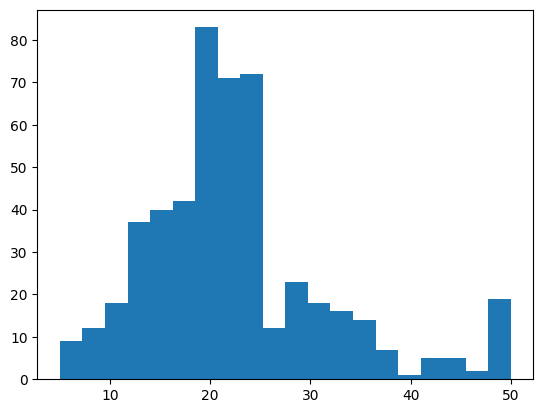

In [25]:
plt.hist(df['medv'], bins=20)
plt.show()

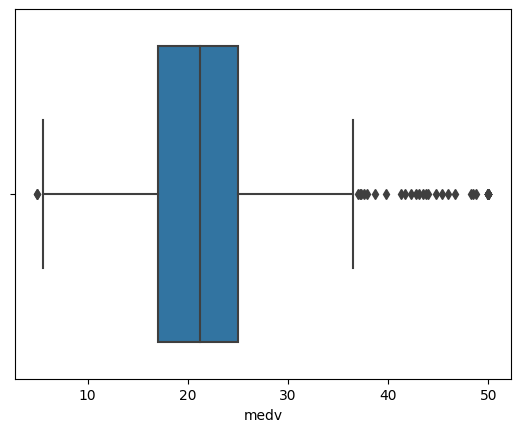

In [28]:
sns.boxplot(data=df, x='medv')
plt.show()

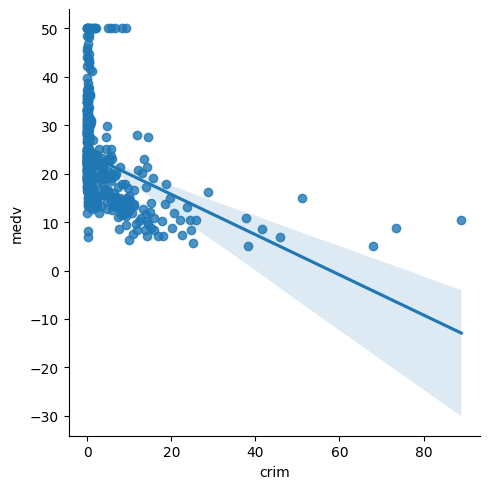

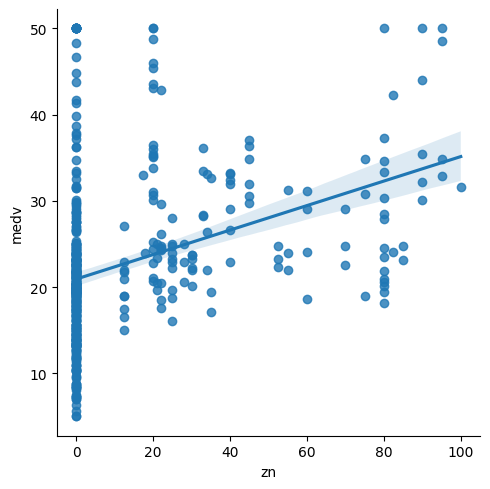

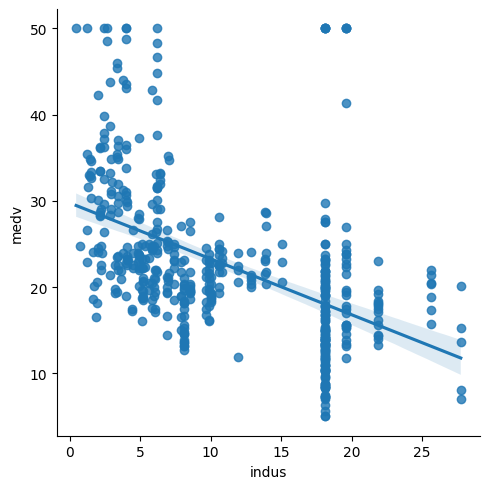

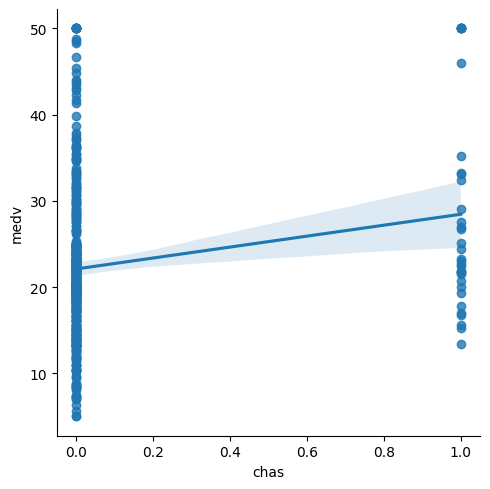

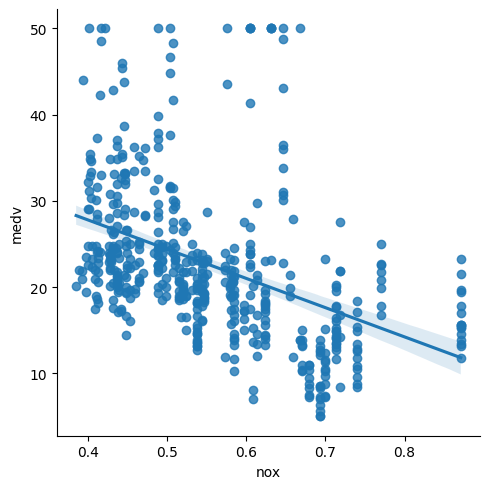

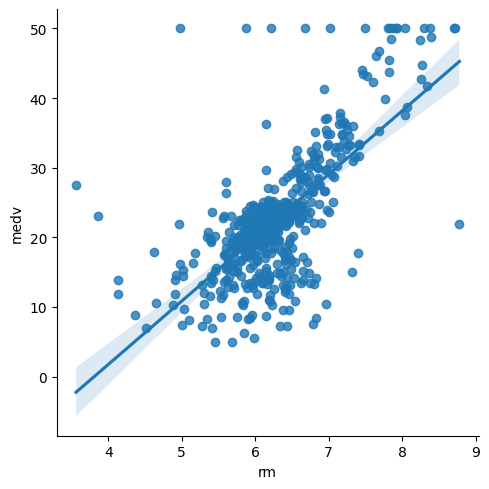

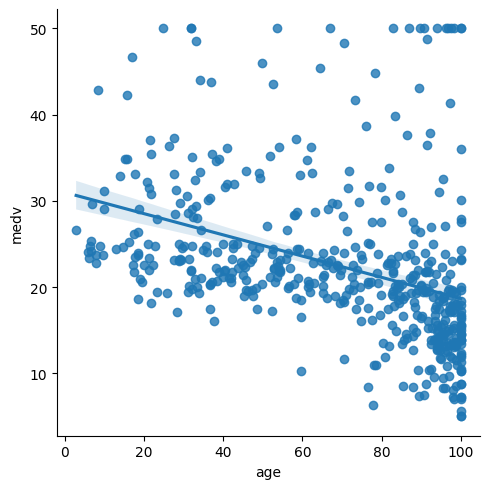

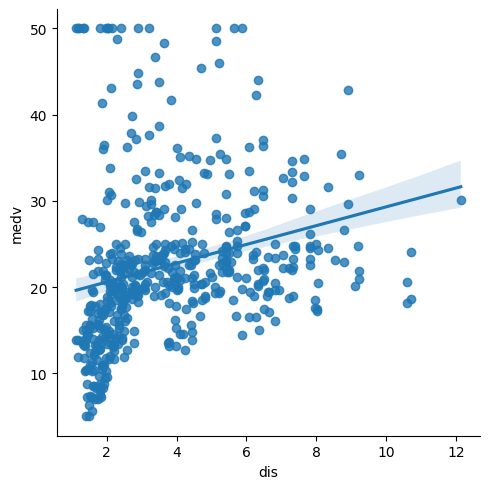

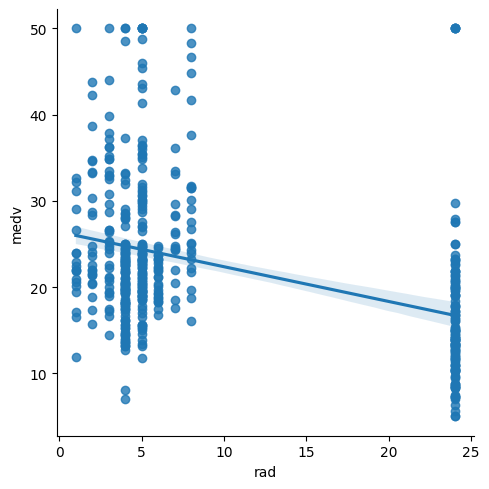

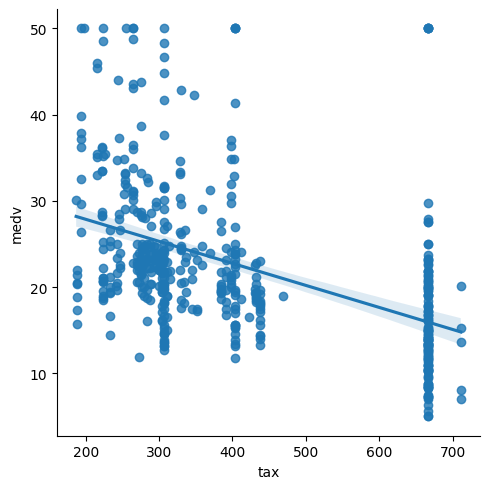

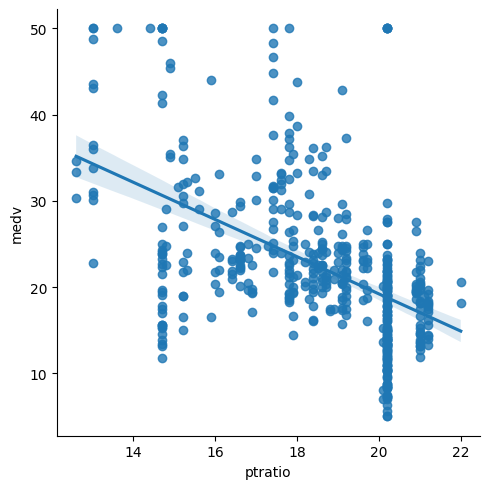

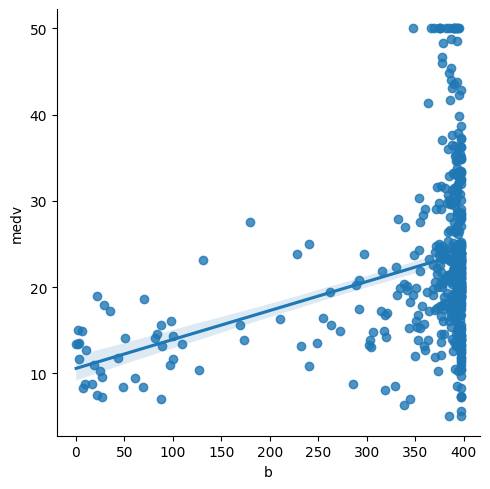

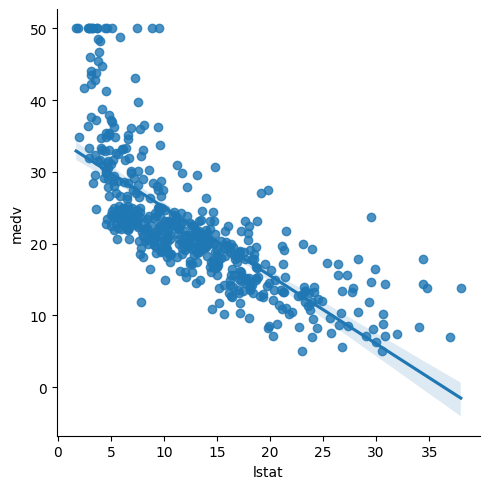

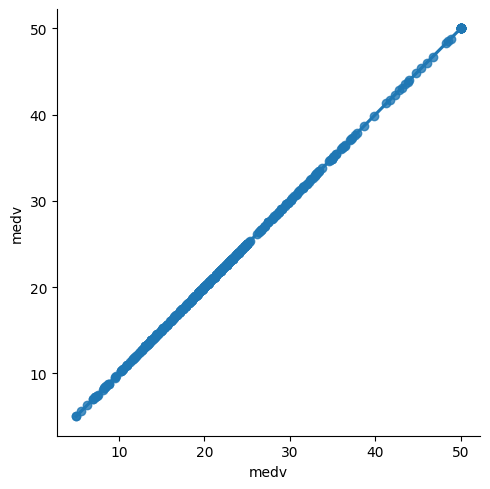

In [31]:
for i, col in enumerate(df.columns):
    sns.lmplot(x=col,y="medv",data=df,fit_reg=True)

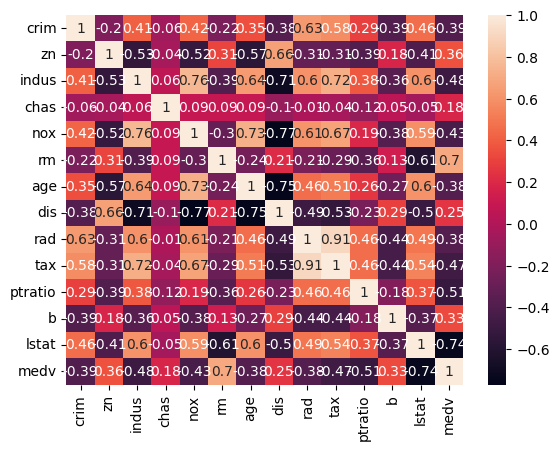

In [32]:
matriz_corr = df.corr().round(2)

sns.heatmap(data=matriz_corr, annot=True)
plt.show()

# Pronosticando con una variable

In [33]:
X = df.rm
y = df.medv

In [34]:
# Es mejor usar arreglos de la forma(n, 1)

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [37]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [38]:
prediction = regression.predict(X_train)

In [39]:
# RMSE en numpy usa sólo los valores reales y las predicciones
rmse = (np.sqrt(mean_squared_error(Y_train, prediction)))

# en scikitlearn se estima en una sóla línea las predicciones
r2 = round(regression.score(X_train, Y_train),2)

print("Desempeño del modelo para los datos de entrenamiento")
print("--------------------------------------")
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print("\n")

Desempeño del modelo para los datos de entrenamiento
--------------------------------------
RMSE: 6.557180458295626
R2: 0.51




In [41]:
prediction_test = regression.predict(X_test)

# RMSE en numpy usa sólo los valores reales y las predicciones
rmse = (np.sqrt(mean_squared_error(Y_test, prediction_test)))

# en scikitlearn se estima en una sóla línea las predicciones
r2 = round(regression.score(X_test, Y_test),2)

print("Desempeño del modelo para los datos de entrenamiento")
print("--------------------------------------")
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print("\n")

Desempeño del modelo para los datos de entrenamiento
--------------------------------------
RMSE: 6.792994578778734
R2: 0.37




In [50]:
df['predic1'] = regression.predict(np.array(df.rm).reshape(-1,1))
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,predic1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.218763
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.779124
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.921227
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.173094
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.565991


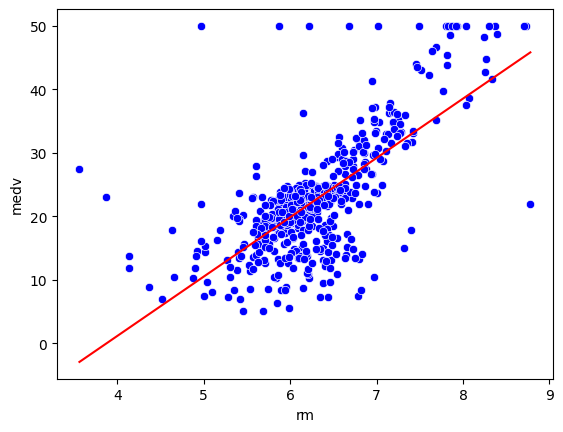

In [56]:
sns.scatterplot(data=df, x='rm', y='medv', color='blue')
sns.lineplot(data=df, x='rm', y='predic1', color='red')
plt.show()

# Regresion Multivariable

In [63]:
X = df.drop(['medv', 'predic1'], axis=1)
y = df.medv

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


In [67]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [68]:
reg_all = LinearRegression()
reg_all. fit(X_train, y_train)
prediction_all = reg_all.predict(X_train)

In [69]:
# RMSE en numpy usa sólo los valores reales y las predicciones
rmse = (np.sqrt(mean_squared_error(y_train, prediction_all)))

# en scikitlearn se estima en una sóla línea las predicciones
r2 = round(reg_all.score(X_train, y_train),2)

print("Desempeño del modelo para los datos de entrenamiento")
print("--------------------------------------")
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print("\n")

Desempeño del modelo para los datos de entrenamiento
--------------------------------------
RMSE: 4.6520331848801675
R2: 0.75




In [70]:
prediction_all_test = reg_all.predict(X_test)

In [71]:
# RMSE en numpy usa sólo los valores reales y las predicciones
rmse = (np.sqrt(mean_squared_error(y_test, prediction_all_test)))

# en scikitlearn se estima en una sóla línea las predicciones
r2 = round(reg_all.score(X_test, y_test),2)

print("Desempeño del modelo para los datos de entrenamiento")
print("--------------------------------------")
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print("\n")

Desempeño del modelo para los datos de entrenamiento
--------------------------------------
RMSE: 4.928602182665339
R2: 0.67




Text(0.5, 1.0, 'Precios Reales vs. Precios Pronosticados de Casas')

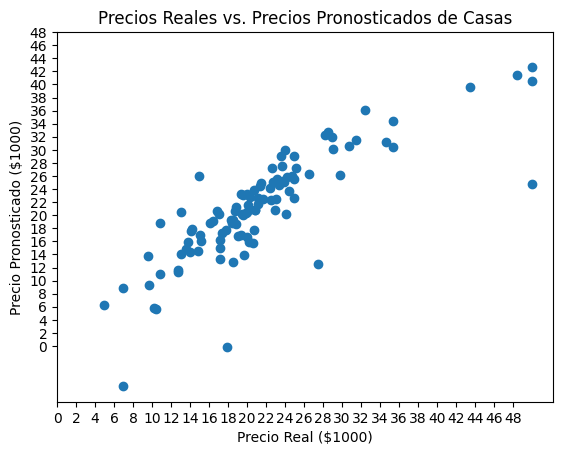

In [81]:
# pasa los precios reales de test y los pronósticos para graficarlos
plt.scatter(y_test, prediction_all_test) # dos argumentos

# estas 5 líneas de código no necesitas modificarlas
plt.xlabel("Precio Real ($1000)")
plt.ylabel("Precio Pronosticado ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test)),2))
plt.title("Precios Reales vs. Precios Pronosticados de Casas")